In [3]:
# Load packages
import os
import pandas as pd
import numpy as np

# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates
from tqdm import tqdm

# Advanced plotting functionality with seaborn
import seaborn as sns
#import folium  #needed for interactive map
#from folium.plugins import HeatMap
#from folium.plugins import FastMarkerCluster

sns.set(style="whitegrid")  # can set style depending on how you'd like it to look

In [2]:
!pip install tqdm

    100% |████████████████████████████████| 81kB 1.1MB/s ta 0:00:01


In [11]:
!pip install folium

    100% |████████████████████████████████| 102kB 5.2MB/s a 0:00:011


## Import Dataframe

In [2]:
df = pd.read_csv('FimaNfipClaims.csv')

/Users/Sathya/anaconda3/envs/pyrecent/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.columns

Index(['agricultureStructureIndicator', 'asOfDate', 'baseFloodElevation',
       'basementEnclosureCrawlspace', 'reportedCity', 'condominiumIndicator',
       'policyCount', 'countyCode', 'communityRatingSystemDiscount',
       'dateOfLoss', 'elevatedBuildingIndicator',
       'elevationCertificateIndicator', 'elevationDifference', 'censusTract',
       'floodZone', 'houseWorship', 'latitude', 'longitude',
       'locationOfContents', 'lowestAdjacentGrade', 'lowestFloorElevation',
       'numberOfFloorsInTheInsuredBuilding', 'nonProfitIndicator',
       'obstructionType', 'occupancyType', 'originalConstructionDate',
       'originalNBDate', 'amountPaidOnBuildingClaim',
       'amountPaidOnContentsClaim',
       'amountPaidOnIncreasedCostOfComplianceClaim',
       'postFIRMConstructionIndicator', 'rateMethod',
       'smallBusinessIndicatorBuilding', 'state',
       'totalBuildingInsuranceCoverage', 'totalContentsInsuranceCoverage',
       'yearOfLoss', 'reportedZipcode', 'primaryReside

In [4]:
df[['amountPaidOnBuildingClaim','amountPaidOnContentsClaim','amountPaidOnIncreasedCostOfComplianceClaim','totalBuildingInsuranceCoverage', 'totalContentsInsuranceCoverage']]

,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage
0,47601.75,64.36,NaN,125300.0,5000.0
1,NaN,NaN,NaN,250000.0,100000.0
2,3743.72,893.10,NaN,250000.0,100000.0
3,34500.00,NaN,NaN,34500.0,0.0
4,18703.10,NaN,NaN,250000.0,100000.0
...,...,...,...,...,...
2502811,6018.95,NaN,NaN,78000.0,0.0
2502812,6931.21,NaN,NaN,130700.0,0.0
2502813,13686.86,NaN,NaN,29000.0,0.0
2502814,69919.61,19549.61,NaN,75000.0,23000.0


In [9]:
df['amountPaidOnContentsClaim'].describe()

count    939285.000000
mean      14560.209967
std       29681.015047
min      -41276.320000
25%        1434.960000
50%        5069.210000
75%       15949.710000
max      750000.000000
Name: amountPaidOnContentsClaim, dtype: float64

## Cleaning

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
df['state'].value_counts().plot(ax=ax, kind='bar')
ax.tick_params(axis='x', rotation=45)
sum(df['state'].value_counts())
#ASSUMPTION: only two are nans, so we can filter by louisiana without risking losing too much
#data, not risking any 

In [ ]:
louisiana = df[(df['yearOfLoss'].isin(range(2005, 2008))) & (df['state']=='LA')]
louisiana

### Other Cleaning

In [ ]:
#creating pandas-recognized datetime column and then filtering for within a few months of Katrina.

louisiana['dateTimeOfLoss'] = pd.to_datetime(louisiana['dateOfLoss'], infer_datetime_format=True)
louisiana_katrina = louisiana[(louisiana['dateTimeOfLoss'] > "2005-08-10") & (louisiana['dateTimeOfLoss'] < "2006-02-01")]

In [ ]:
pd.set_option('max_columns', None)
louisiana_katrina
#pd.reset_option('max_columns')

In [ ]:
#dropping all rows that have nas for reported zipcode (financial data) and then casting to int.
louisiana_katrina = louisiana_katrina.dropna(subset = ['reportedZipcode'])
louisiana_katrina['reportedZipcode'] = louisiana_katrina['reportedZipcode'].apply(lambda zipcode: int(zipcode))

In [ ]:
louisiana_katrina.isna().sum()

In [ ]:
louisiana_katrina.to_csv('semiclean_katrina_louisiana_FIMA_NFIP.csv')

## EDA

In [10]:
louisiana_katrina = pd.read_csv('semiclean_katrina_louisiana_FIMA_NFIP.csv')
louisiana_katrina['dateTimeOfLoss'] = pd.to_datetime(louisiana_katrina['dateOfLoss'], infer_datetime_format=True)

/Users/Sathya/anaconda3/envs/pyrecent/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
louisiana_katrina

,Unnamed: 0,agricultureStructureIndicator,asOfDate,baseFloodElevation,basementEnclosureCrawlspace,reportedCity,condominiumIndicator,policyCount,countyCode,communityRatingSystemDiscount,...,rateMethod,smallBusinessIndicatorBuilding,state,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,reportedZipcode,primaryResidence,id,dateTimeOfLoss
0,919,0.0,2020-11-22T00:53:40.710Z,3.0,NaN,KENNER,N,1.0,22051.0,6.0,...,1,0.0,LA,163400.0,220500.0,2005,70062,0.0,5fc65baef54611084d40ea08,2005-08-29 04:00:00+00:00
1,1345,0.0,2020-11-22T00:53:40.710Z,NaN,NaN,HARAHAN,N,1.0,22051.0,8.0,...,1,0.0,LA,200000.0,100000.0,2005,70123,0.0,5fc65baef54611084d40eb65,2005-08-29 04:00:00+00:00
2,1447,0.0,2020-11-22T00:53:40.710Z,NaN,NaN,SLIDELL,N,1.0,22103.0,7.0,...,1,0.0,LA,117000.0,38600.0,2005,70458,0.0,5fc65baef54611084d40ec0f,2005-08-29 04:00:00+00:00
3,2256,0.0,2020-11-22T00:53:40.710Z,NaN,0.0,NEW ORLEANS,N,1.0,22071.0,8.0,...,7,0.0,LA,250000.0,100000.0,2005,70118,1.0,5fc65baff54611084d40ef57,2005-08-29 04:00:00+00:00
4,2320,0.0,2020-11-22T00:53:40.710Z,NaN,0.0,NEW ORLEANS,N,1.0,22071.0,8.0,...,7,0.0,LA,100000.0,40000.0,2005,70122,0.0,5fc65baff54611084d40ef89,2005-08-29 04:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188773,2502600,0.0,2020-11-22T00:53:40.710Z,NaN,NaN,JEFFERSON,N,1.0,22051.0,5.0,...,1,0.0,LA,100000.0,15700.0,2005,70121,1.0,5fc65dd3f54611084d671685,2005-08-29 04:00:00+00:00
188774,2502610,0.0,2020-11-22T00:53:40.710Z,NaN,NaN,NEW ORLEANS,N,1.0,22071.0,8.0,...,1,0.0,LA,91300.0,21000.0,2005,70126,1.0,5fc65dd3f54611084d671660,2005-08-29 04:00:00+00:00
188775,2502623,0.0,2020-11-22T00:53:40.710Z,NaN,NaN,KENNER,N,1.0,22051.0,7.0,...,1,0.0,LA,50000.0,10000.0,2005,70065,1.0,5fc65dd3f54611084d671686,2005-08-29 04:00:00+00:00
188776,2502642,0.0,2020-11-22T00:53:40.710Z,9.0,NaN,NEW IBERIA,N,1.0,22045.0,NaN,...,1,0.0,LA,50000.0,0.0,2005,70560,1.0,5fc65dd3f54611084d6716ae,2005-09-24 04:00:00+00:00


In [3]:
folium_map = folium.Map(location=[31.298430, -92.469646],
                        zoom_start=7,
                        tiles="Stamen Terrain")
#Now we can have a scatter plot of the first 1000 data points on the above map
'''for _, listings in tqdm(louisiana_katrina.iterrows()):
    if np.isnan(listings['latitude']):
        continue
    marker = folium.CircleMarker(location=[listings["latitude"],listings["longitude"]],radius=5,color="r",fill=True)
    marker.add_to(folium_map)'''



folium_map.add_child(FastMarkerCluster(louisiana_katrina[~(louisiana_katrina['latitude'].isna())][['latitude', 'longitude']].values.tolist()))


folium_map

NameError: name 'folium' is not defined

In [16]:
counts = louisiana_katrina.copy()
counts['count'] = 1
counts = counts.groupby(['reportedZipcode']).count()['count'].reset_index().set_index('reportedZipcode')
counts = counts.sort_values(by='reportedZipcode')
counts

,count
reportedZipcode,
70000,2
70001,5510
70002,4450
70003,8433
70004,4
...,...
71409,1
71423,1
71433,1


In [37]:
amounts = louisiana_katrina.copy()
amounts = amounts.groupby(['reportedZipcode']).sum() \
    [['amountPaidOnBuildingClaim','amountPaidOnContentsClaim',
     'amountPaidOnIncreasedCostOfComplianceClaim','totalBuildingInsuranceCoverage', 
     'totalContentsInsuranceCoverage']].reset_index().set_index('reportedZipcode')
amounts = amounts.sort_values(by='reportedZipcode')
merged_counts = counts.reset_index().merge(amounts.reset_index()).set_index('reportedZipcode').sort_values(by='reportedZipcode')

In [38]:
merged_counts.to_csv('LA_NFIP_claims_counts.csv')

In [42]:
merged = pd.read_csv('merged_socioeconomic_katrina_data.csv')
merged = merged.drop(columns=[merged.columns[0]])

In [44]:
test[test['amountPaidOnIncreasedCostOfComplianceClaim']!=0]

,IncomeBucket1,IncomeBucket2,IncomeBucket3,IncomeBucket4,IncomeBucket5,IncomeBucket6,IncomeBucket7,IncomeBucket8,IncomeBucket9,MedianHHIncome,...,Pop,ZipArea,Density,BachelorsRate,count,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage
0,0.06799,0.05228,0.12038,0.10860,0.13719,0.16405,0.12205,0.13274,0.04742,51132.00000,...,37996,5.99900,6333.72229,9100.00000,5510,185659415.89000,51381016.89000,3415454.59000,787342000.00000,215159400.00000
1,0.06344,0.03951,0.09630,0.08096,0.14886,0.17199,0.10741,0.13020,0.09378,56786.00000,...,18879,3.21900,5864.86486,6504.00000,4450,292795701.10000,97801585.70000,1006826.25000,818400100.00000,212752400.00000
2,0.05175,0.03463,0.09961,0.09516,0.12715,0.20618,0.13154,0.15299,0.06555,58624.00000,...,40150,7.01900,5720.18806,9036.00000,8433,240340893.95000,80550898.82000,9182640.25000,1088872100.00000,298825800.00000
3,0.04589,0.03268,0.08606,0.08184,0.15706,0.15971,0.11364,0.15231,0.06272,62982.00000,...,24339,4.18300,5818.55128,9197.00000,4788,230917281.17000,79844358.24000,1798270.73000,791996000.00000,235310300.00000
4,0.05831,0.02453,0.13241,0.10385,0.09461,0.14115,0.12603,0.15762,0.07881,63695.00000,...,15703,2.58900,6065.27617,4055.00000,4686,331357467.34000,110330610.28000,3824786.81000,711249700.00000,183343200.00000
7,0.09786,0.04668,0.15636,0.08661,0.13611,0.16029,0.13723,0.13442,0.02756,47717.00000,...,3635,1.74800,2079.51945,533.00000,2926,246458065.69000,78765424.87000,3001556.27000,282272000.00000,91094500.00000
8,0.06061,0.01632,0.13986,0.12354,0.20513,0.26340,0.05828,0.07226,0.04196,45819.00000,...,1227,4.37900,280.20096,90.00000,252,3968313.76000,1253554.09000,350215.00000,23028200.00000,5205300.00000
9,0.05252,0.04045,0.07818,0.05591,0.15228,0.20292,0.09942,0.19120,0.08634,64280.00000,...,15590,62.50700,249.41207,2563.00000,1205,19865725.90000,8684108.68000,90000.00000,192242500.00000,69774200.00000
10,0.23529,0.27451,0.14706,0.03922,0.12745,0.07843,0.08824,0.00980,0.00000,14868.00000,...,426,1.33000,320.30075,12.00000,223,9884757.83000,4375958.05000,56750.00000,10563100.00000,4504500.00000
12,0.25673,0.01035,0.22153,0.04762,0.09938,0.10559,0.09110,0.02692,0.04141,32697.00000,...,1604,63.17400,25.39019,134.00000,296,27851374.72000,9012358.31000,108185.00000,41094400.00000,13607900.00000


In [5]:
#to make float
floats = ['IncomeBucket1', 'IncomeBucket2', 'IncomeBucket3', 'IncomeBucket4', 'IncomeBucket5',
       'IncomeBucket6', 'IncomeBucket7', 'IncomeBucket8', 'IncomeBucket9',
       'MedianHHIncome', 'MeanHHIncome']
for col in floats:
    print(col)
    merged[col] = merged[col].apply(lambda x: float(x) if x != '-' and x != 'N' else None)

IncomeBucket1
IncomeBucket2
IncomeBucket3
IncomeBucket4
IncomeBucket5
IncomeBucket6
IncomeBucket7
IncomeBucket8
IncomeBucket9
MedianHHIncome
MeanHHIncome


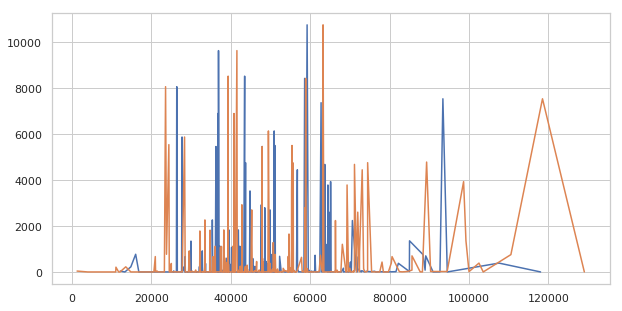

In [6]:
plt.figure(figsize=(10, 5))
by_median = merged.sort_values(by='MedianHHIncome')
by_mean = merged.sort_values(by='MeanHHIncome')
plt.plot(by_median['MedianHHIncome'], by_median['count'])
plt.plot(by_mean['MeanHHIncome'] - (61784.726000000002 - 46008.64904862579), by_mean['count'])

In [7]:
by_median['MedianHHIncome'].sum()/by_median['MedianHHIncome'].count()

46008.64904862579

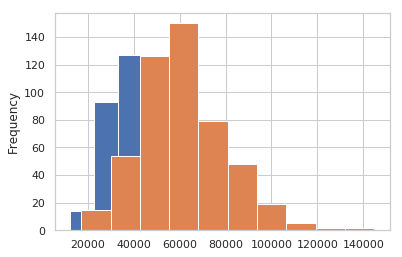

In [8]:
by_median['MedianHHIncome'].plot.hist()
by_mean['MeanHHIncome'].plot.hist()

In [20]:
sns.displot(merged, x=['MedianHHIncome', 'MeanHHIncome'], hue="count")

AttributeError: module 'seaborn' has no attribute 'displot'

In [ ]:
sns.__version__

In [9]:
merged.columns

Index(['ZIP', 'IncomeBucket1', 'IncomeBucket2', 'IncomeBucket3',
       'IncomeBucket4', 'IncomeBucket5', 'IncomeBucket6', 'IncomeBucket7',
       'IncomeBucket8', 'IncomeBucket9', 'MedianHHIncome', 'MeanHHIncome',
       'PercInsured', 'TotalPop', 'SexRatio', 'MedianAge', 'PercPopUnder18',
       'PercPopOver65', 'PercWhite', 'PercBlack', 'PercAsian', 'PercLatino',
       'HousingUnits', 'UnempRate', 'Pop', 'ZipArea', 'Density',
       'BachelorsRate', 'count', 'amountPaidOnBuildingClaim',
       'amountPaidOnContentsClaim',
       'amountPaidOnIncreasedCostOfComplianceClaim',
       'totalBuildingInsuranceCoverage', 'totalContentsInsuranceCoverage'],
      dtype='object')

In [10]:
merged.corr() #include weighted amount of nfip claim amounts, meaning of filing for claim

,ZIP,IncomeBucket1,IncomeBucket2,IncomeBucket3,IncomeBucket4,IncomeBucket5,IncomeBucket6,IncomeBucket7,IncomeBucket8,IncomeBucket9,...,Pop,ZipArea,Density,BachelorsRate,count,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage
ZIP,1.000000,0.087433,0.107403,0.112899,0.058819,0.020782,-0.089024,-0.042119,-0.125637,-0.071331,...,-0.252861,0.278131,-0.272015,-0.256175,-0.404172,-0.324534,-0.336693,-0.265063,-0.415476,-0.421890
IncomeBucket1,0.087433,1.000000,0.130957,0.072306,-0.043425,-0.150602,-0.387267,-0.283801,-0.365172,-0.246351,...,-0.097221,-0.002353,0.042058,-0.137748,-0.024417,0.032126,0.010653,0.019889,-0.026186,-0.042047
IncomeBucket2,0.107403,0.130957,1.000000,0.011435,0.008981,-0.066184,-0.266539,-0.225609,-0.284736,-0.150074,...,-0.096454,0.077434,-0.033872,-0.142375,-0.033779,0.001411,-0.015604,-0.001392,-0.044256,-0.056267
IncomeBucket3,0.112899,0.072306,0.011435,1.000000,-0.019400,-0.095320,-0.109852,-0.268338,-0.272350,-0.302097,...,-0.106515,0.058610,-0.042389,-0.172776,-0.059997,-0.030125,-0.035020,-0.043672,-0.080318,-0.087344
IncomeBucket4,0.058819,-0.043425,0.008981,-0.019400,1.000000,-0.062877,-0.107967,-0.205004,-0.257969,-0.148402,...,-0.043631,0.032551,-0.037327,-0.099795,-0.026267,-0.020095,-0.023918,0.004676,-0.038515,-0.043552
IncomeBucket5,0.020782,-0.150602,-0.066184,-0.095320,-0.062877,1.000000,-0.140526,-0.101833,-0.104548,-0.172760,...,-0.032870,-0.019317,-0.034862,-0.060798,-0.017219,-0.019162,-0.013270,-0.024031,-0.016374,-0.010445
IncomeBucket6,-0.089024,-0.387267,-0.266539,-0.109852,-0.107967,-0.140526,1.000000,-0.049771,0.099447,-0.014598,...,0.047632,0.006459,-0.005101,0.039808,0.019859,-0.039432,-0.020089,-0.021049,-0.013101,0.001912
IncomeBucket7,-0.042119,-0.283801,-0.225609,-0.268338,-0.205004,-0.101833,-0.049771,1.000000,0.070979,0.055126,...,0.006468,-0.056405,-0.037754,0.031847,0.007651,-0.014916,0.008041,-0.032303,0.023591,0.039678
IncomeBucket8,-0.125637,-0.365172,-0.284736,-0.272350,-0.257969,-0.104548,0.099447,0.070979,1.000000,0.117563,...,0.134402,0.008196,-0.008637,0.200655,0.034915,-0.018317,-0.002297,-0.001368,0.034427,0.046214
IncomeBucket9,-0.071331,-0.246351,-0.150074,-0.302097,-0.148402,-0.172760,-0.014598,0.055126,0.117563,1.000000,...,0.092616,-0.064777,0.028551,0.161384,0.036844,0.023978,0.027462,0.031098,0.076680,0.080602


## Tract Data + NFHL Risk Factors

In [13]:
nfhl_to_zip = pd.read_csv('nfhl_to_zip.csv')

In [14]:
nfhl_to_zip.head()

,FLD_ZONE,ZONE_SUBTY,SFHA_TF,SHAPE_Area,GEOID,Tract,RISK
0,X,AREA OF MINIMAL FLOOD HAZARD,F,1.789667e-07,2.200196e+10,9601.0,moderate_to_low
1,AE,NaN,T,4.082684e-05,2.200196e+10,9601.0,high
2,AE,NaN,T,5.973499e-05,2.200196e+10,9601.0,high
3,A,NaN,T,3.987519e-04,2.200196e+10,9601.0,high
4,AE,FLOODWAY,T,3.696726e-05,2.200196e+10,9601.0,high


In [15]:
nfhl_cleaned = nfhl_to_zip[~(nfhl_to_zip['RISK'].isna()) & \
    ~(nfhl_to_zip['RISK']=='undetermined') &  ~(nfhl_to_zip['Tract'].isna())]
area_totals = nfhl_cleaned.groupby(['Tract']).sum()
area_merged = nfhl_cleaned.merge(area_totals, on="Tract", how="left", suffixes=('', '_r'))
area_merged = area_merged.rename(columns={'SHAPE_Area_r':'SHAPE_Area_TOTAL'}).drop(['GEOID_r'], axis=1)
area_merged['SHAPE_Proportional_Area'] = area_merged['SHAPE_Area'] / area_merged['SHAPE_Area_TOTAL']
area_merged = area_merged.drop(['SHAPE_Area_TOTAL'], axis=1)
area_merged.head()

,FLD_ZONE,ZONE_SUBTY,SFHA_TF,SHAPE_Area,GEOID,Tract,RISK,SHAPE_Proportional_Area
0,X,AREA OF MINIMAL FLOOD HAZARD,F,1.789667e-07,2.200196e+10,9601.0,moderate_to_low,4.672137e-07
1,AE,NaN,T,4.082684e-05,2.200196e+10,9601.0,high,1.065833e-04
2,AE,NaN,T,5.973499e-05,2.200196e+10,9601.0,high,1.559453e-04
3,A,NaN,T,3.987519e-04,2.200196e+10,9601.0,high,1.040989e-03
4,AE,FLOODWAY,T,3.696726e-05,2.200196e+10,9601.0,high,9.650740e-05


In [16]:
#verification that area weighting went correctly
area_merged.groupby(['Tract']).sum()['SHAPE_Proportional_Area'].unique()

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

### Weighting of NFHL Risk Data

In [17]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [26]:
area_merged['RISK'].unique()
# huge part of the model. our results hinge around these numbers, so we should be really careful
# about what we choose. it's not important that they're extremely accurate more so than we have a good,
# logical backing for each of them. the maximum (high coastal?) should be 1, and the minimum (moderate_to_low)
# should be greater than 0.
risk_mapping = {
    'moderate_to_low': 0.1, 
    'moderate': .2,
    'high': 1,
    'high_coastal': 1
}
area_merged['NUMERICAL_RISK'] = area_merged['RISK'].apply(lambda risk: risk_mapping[risk])
area_merged['AREA_WEIGHTED_RISK'] = area_merged['NUMERICAL_RISK'] * area_merged['SHAPE_Proportional_Area']
grouped = area_merged.groupby(['Tract']).sum()

custom_geoid = nfhl_cleaned.copy()
custom_geoid[['GEOID', 'Tract']]
custom_geoid = custom_geoid.groupby(['GEOID', 'Tract']).sum().reset_index()
custom_geoid.head()
grouped = grouped.reset_index()[['Tract', 'AREA_WEIGHTED_RISK']]
grouped = grouped.merge(custom_geoid[['GEOID', 'Tract']], on='Tract', how='inner', suffixes=('', '_r'))

## Merging with GEOID + Zipcode Crosswalk

In [19]:
# using grouped
crosswalk = pd.read_excel('ZIP_TRACT_122020.xlsx')

In [27]:
grouped['GEOID'] = grouped['GEOID'].apply(lambda x: int(x))
grouped = grouped.merge(crosswalk[['ZIP', 'TRACT']], left_on='GEOID', right_on='TRACT', how='left')
grouped = grouped[['AREA_WEIGHTED_RISK', 'ZIP']]
grouped.head(10)

,AREA_WEIGHTED_RISK,ZIP
0,0.69425,70601.00000
1,0.69425,70602.00000
2,0.69425,70629.00000
3,0.69425,71418.00000
4,0.69425,71326.00000
5,0.69425,71340.00000
6,0.69425,71343.00000
7,0.69425,71363.00000
8,0.69425,71368.00000
9,0.69425,71401.00000


In [28]:
average_grouped = grouped.groupby('ZIP').mean().reset_index()
se_count_merged = merged.merge(average_grouped, how='left', on='ZIP')

In [32]:
se_count_merged.corr()

,ZIP,IncomeBucket1,IncomeBucket2,IncomeBucket3,IncomeBucket4,IncomeBucket5,IncomeBucket6,IncomeBucket7,IncomeBucket8,IncomeBucket9,...,ZipArea,Density,BachelorsRate,count,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,AREA_WEIGHTED_RISK
ZIP,1.00000,0.08743,0.10740,0.11290,0.05882,0.02078,-0.08902,-0.04212,-0.12564,-0.07133,...,0.27813,-0.27201,-0.25617,-0.40417,-0.32453,-0.33669,-0.26506,-0.41548,-0.42189,-0.32022
IncomeBucket1,0.08743,1.00000,0.13096,0.07231,-0.04342,-0.15060,-0.38727,-0.28380,-0.36517,-0.24635,...,-0.00235,0.04206,-0.13775,-0.02442,0.03213,0.01065,0.01989,-0.02619,-0.04205,-0.02268
IncomeBucket2,0.10740,0.13096,1.00000,0.01143,0.00898,-0.06618,-0.26654,-0.22561,-0.28474,-0.15007,...,0.07743,-0.03387,-0.14238,-0.03378,0.00141,-0.01560,-0.00139,-0.04426,-0.05627,-0.03085
IncomeBucket3,0.11290,0.07231,0.01143,1.00000,-0.01940,-0.09532,-0.10985,-0.26834,-0.27235,-0.30210,...,0.05861,-0.04239,-0.17278,-0.06000,-0.03013,-0.03502,-0.04367,-0.08032,-0.08734,-0.14091
IncomeBucket4,0.05882,-0.04342,0.00898,-0.01940,1.00000,-0.06288,-0.10797,-0.20500,-0.25797,-0.14840,...,0.03255,-0.03733,-0.09980,-0.02627,-0.02010,-0.02392,0.00468,-0.03851,-0.04355,-0.03932
IncomeBucket5,0.02078,-0.15060,-0.06618,-0.09532,-0.06288,1.00000,-0.14053,-0.10183,-0.10455,-0.17276,...,-0.01932,-0.03486,-0.06080,-0.01722,-0.01916,-0.01327,-0.02403,-0.01637,-0.01045,-0.00352
IncomeBucket6,-0.08902,-0.38727,-0.26654,-0.10985,-0.10797,-0.14053,1.00000,-0.04977,0.09945,-0.01460,...,0.00646,-0.00510,0.03981,0.01986,-0.03943,-0.02009,-0.02105,-0.01310,0.00191,-0.02225
IncomeBucket7,-0.04212,-0.28380,-0.22561,-0.26834,-0.20500,-0.10183,-0.04977,1.00000,0.07098,0.05513,...,-0.05640,-0.03775,0.03185,0.00765,-0.01492,0.00804,-0.03230,0.02359,0.03968,0.08366
IncomeBucket8,-0.12564,-0.36517,-0.28474,-0.27235,-0.25797,-0.10455,0.09945,0.07098,1.00000,0.11756,...,0.00820,-0.00864,0.20066,0.03492,-0.01832,-0.00230,-0.00137,0.03443,0.04621,0.11723
IncomeBucket9,-0.07133,-0.24635,-0.15007,-0.30210,-0.14840,-0.17276,-0.01460,0.05513,0.11756,1.00000,...,-0.06478,0.02855,0.16138,0.03684,0.02398,0.02746,0.03110,0.07668,0.08060,0.05753


In [57]:
cols = ['amountPaidOnBuildingClaim','amountPaidOnContentsClaim','amountPaidOnIncreasedCostOfComplianceClaim','totalBuildingInsuranceCoverage', 'totalContentsInsuranceCoverage']
def count0(row):
    if np.isnan(row['amountPaidOnBuildingClaim']):
        if row['count'] == 0:
            for c in cols:
                row[c] = 0
    return row

se_count_merged_interp = se_count_merged.copy()
se_count_merged_interp = se_count_merged_interp.apply(count0, axis=1)

se_count_merged_interp[se_count_merged_interp.isna().any(axis=1)]
se_count_merged_interp['AREA_WEIGHTED_RISK'] = se_count_merged_interp['AREA_WEIGHTED_RISK'].fillna(
se_count_merged_interp['AREA_WEIGHTED_RISK'].mean()
)
se_count_merged_clean = se_count_merged_interp[~se_count_merged_interp[['Density', 'PercLatino', 'BachelorsRate', 'HousingUnits', 'TotalPop',
       'Pop', 'AREA_WEIGHTED_RISK', 'PercAsian', 'PercBlack', 'MeanHHIncome',
       'UnempRate', 'MedianHHIncome', 'PercInsured', 'PercWhite', 'ZipArea']].isna().any(axis=1)]
se_count_merged_clean

,ZIP,IncomeBucket1,IncomeBucket2,IncomeBucket3,IncomeBucket4,IncomeBucket5,IncomeBucket6,IncomeBucket7,IncomeBucket8,IncomeBucket9,...,ZipArea,Density,BachelorsRate,count,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,AREA_WEIGHTED_RISK
0,70001,0.06799,0.05228,0.12038,0.10860,0.13719,0.16405,0.12205,0.13274,0.04742,...,5.99900,6333.72229,9100.00000,5510,185659415.89000,51381016.89000,3415454.59000,787342000.00000,215159400.00000,0.64632
1,70002,0.06344,0.03951,0.09630,0.08096,0.14886,0.17199,0.10741,0.13020,0.09378,...,3.21900,5864.86486,6504.00000,4450,292795701.10000,97801585.70000,1006826.25000,818400100.00000,212752400.00000,0.51352
2,70003,0.05175,0.03463,0.09961,0.09516,0.12715,0.20618,0.13154,0.15299,0.06555,...,7.01900,5720.18806,9036.00000,8433,240340893.95000,80550898.82000,9182640.25000,1088872100.00000,298825800.00000,0.67404
3,70005,0.04589,0.03268,0.08606,0.08184,0.15706,0.15971,0.11364,0.15231,0.06272,...,4.18300,5818.55128,9197.00000,4788,230917281.17000,79844358.24000,1798270.73000,791996000.00000,235310300.00000,0.58541
4,70006,0.05831,0.02453,0.13241,0.10385,0.09461,0.14115,0.12603,0.15762,0.07881,...,2.58900,6065.27617,4055.00000,4686,331357467.34000,110330610.28000,3824786.81000,711249700.00000,183343200.00000,0.63927
5,70030,0.03726,0.03422,0.06236,0.12700,0.16122,0.16730,0.09582,0.14297,0.12548,...,31.49800,145.56480,456.00000,76,152540.68000,29061.67000,0.00000,8855500.00000,3278200.00000,0.82480
6,70031,0.07056,0.00000,0.11492,0.07460,0.14516,0.16734,0.18548,0.18750,0.05444,...,3.51700,374.18254,130.00000,24,1123.87000,7500.00000,0.00000,3333800.00000,1167200.00000,0.84896
7,70032,0.09786,0.04668,0.15636,0.08661,0.13611,0.16029,0.13723,0.13442,0.02756,...,1.74800,2079.51945,533.00000,2926,246458065.69000,78765424.87000,3001556.27000,282272000.00000,91094500.00000,0.84995
8,70036,0.06061,0.01632,0.13986,0.12354,0.20513,0.26340,0.05828,0.07226,0.04196,...,4.37900,280.20096,90.00000,252,3968313.76000,1253554.09000,350215.00000,23028200.00000,5205300.00000,1.00000
9,70037,0.05252,0.04045,0.07818,0.05591,0.15228,0.20292,0.09942,0.19120,0.08634,...,62.50700,249.41207,2563.00000,1205,19865725.90000,8684108.68000,90000.00000,192242500.00000,69774200.00000,0.95705


In [78]:
se_count_merged_clean.to_csv('final_set.csv')

In [58]:
se_count_merged_clean.corr()['count']

ZIP                                          -0.41842
IncomeBucket1                                -0.01411
IncomeBucket2                                -0.03212
IncomeBucket3                                -0.07112
IncomeBucket4                                -0.04107
IncomeBucket5                                -0.03248
IncomeBucket6                                 0.00506
IncomeBucket7                                 0.00881
IncomeBucket8                                 0.03664
IncomeBucket9                                 0.09102
MedianHHIncome                                0.07642
MeanHHIncome                                  0.13433
PercInsured                                   0.00582
TotalPop                                      0.45270
PercPopUnder18                                0.02008
PercPopOver65                                -0.08327
PercWhite                                    -0.13341
PercBlack                                     0.09603
PercAsian                   

#### Tune Weighting

In [22]:
corr_results = pd.DataFrame()
corr_results['moderate_to_low'] = ""
corr_results['moderate'] = ""
corr_results['high'] = ""
corr_results['high_coastal'] = ""
corr_results['corr'] = ""

def get_corr(risk_mapping_dict): 
    area_merged['NUMERICAL_RISK'] = area_merged['RISK'].apply(lambda risk: risk_mapping_dict[risk])
    area_merged['AREA_WEIGHTED_RISK'] = area_merged['NUMERICAL_RISK'] * area_merged['SHAPE_Proportional_Area']
    grouped = area_merged.groupby(['Tract']).sum()

    custom_geoid = nfhl_cleaned.copy()
    custom_geoid[['GEOID', 'Tract']]
    custom_geoid = custom_geoid.groupby(['GEOID', 'Tract']).sum().reset_index()
    custom_geoid.head()
    grouped = grouped.reset_index()[['Tract', 'AREA_WEIGHTED_RISK']]
    grouped = grouped.merge(custom_geoid[['GEOID', 'Tract']], on='Tract', how='inner', suffixes=('', '_r'))
    
    grouped['GEOID'] = grouped['GEOID'].apply(lambda x: int(x))
    grouped = grouped.merge(crosswalk[['ZIP', 'TRACT']], left_on='GEOID', right_on='TRACT', how='left')
    grouped = grouped[['AREA_WEIGHTED_RISK', 'ZIP']]
    
    average_grouped = grouped.groupby('ZIP').mean().reset_index()
    se_count_merged = merged.merge(average_grouped, how='left', on='ZIP')
    se_count_merged_clean = se_count_merged[~se_count_merged['AREA_WEIGHTED_RISK'].isna()]
    return max(se_count_merged_clean.corr()['AREA_WEIGHTED_RISK'][['amountPaidOnBuildingClaim',
        'amountPaidOnContentsClaim','amountPaidOnIncreasedCostOfComplianceClaim',
        'totalBuildingInsuranceCoverage', 'totalContentsInsuranceCoverage', 'count']])
    
increments = np.linspace(0,1,11)
               
for i in tqdm(increments):
    print(i)
    for j in tqdm(increments):
        print(j)
        for k in increments:
            for l in increments:
                corr = get_corr({
                    'moderate_to_low': i, 
                    'moderate': j,
                    'high': l,
                    'high_coastal': k
                })
                corr_results = corr_results.append({
                    'moderate_to_low': i, 
                    'moderate': j,
                    'high': l,
                    'high_coastal': k,
                    'corr': corr
                }, ignore_index=True)
                
                

  0%|          | 0/11 [00:00<?, ?it/s]

0.0
0.0



  9%|▉         | 1/11 [00:14<02:22, 14.22s/it]

0.1



 18%|█▊        | 2/11 [00:27<02:01, 13.47s/it]

0.2



 27%|██▋       | 3/11 [00:40<01:46, 13.32s/it]

0.3



 36%|███▋      | 4/11 [00:53<01:31, 13.10s/it]

0.4



 45%|████▌     | 5/11 [01:05<01:16, 12.83s/it]

0.5



 55%|█████▍    | 6/11 [01:17<01:03, 12.65s/it]

0.6



 64%|██████▎   | 7/11 [01:29<00:50, 12.53s/it]

0.7



 73%|███████▎  | 8/11 [01:42<00:37, 12.65s/it]

0.8



 82%|████████▏ | 9/11 [01:54<00:24, 12.46s/it]

0.9



 91%|█████████ | 10/11 [02:08<00:12, 12.79s/it]

1.0



  0%|          | 0/11 [00:00<?, ?it/s]

0.1
0.0



  9%|▉         | 1/11 [00:12<02:03, 12.39s/it]

0.1



 18%|█▊        | 2/11 [00:24<01:52, 12.52s/it]

0.2



 27%|██▋       | 3/11 [00:37<01:41, 12.66s/it]

0.3



 36%|███▋      | 4/11 [00:54<01:38, 14.12s/it]

0.4



 45%|████▌     | 5/11 [01:08<01:25, 14.30s/it]

0.5



 55%|█████▍    | 6/11 [01:20<01:07, 13.57s/it]

0.6



 64%|██████▎   | 7/11 [01:37<00:58, 14.65s/it]

0.7



 73%|███████▎  | 8/11 [01:51<00:43, 14.35s/it]

0.8



 82%|████████▏ | 9/11 [02:03<00:27, 13.71s/it]

0.9



 91%|█████████ | 10/11 [02:15<00:13, 13.19s/it]

1.0



  0%|          | 0/11 [00:00<?, ?it/s]

0.2
0.0



  9%|▉         | 1/11 [00:11<01:58, 11.85s/it]

0.1



 18%|█▊        | 2/11 [00:23<01:45, 11.69s/it]

0.2



 27%|██▋       | 3/11 [00:34<01:33, 11.63s/it]

0.3



 36%|███▋      | 4/11 [00:49<01:28, 12.69s/it]

0.4



 45%|████▌     | 5/11 [01:01<01:14, 12.48s/it]

0.5



 55%|█████▍    | 6/11 [01:13<01:01, 12.38s/it]

0.6



 64%|██████▎   | 7/11 [01:25<00:49, 12.28s/it]

0.7



 73%|███████▎  | 8/11 [01:37<00:36, 12.25s/it]

0.8



 82%|████████▏ | 9/11 [01:50<00:24, 12.23s/it]

0.9



 91%|█████████ | 10/11 [02:02<00:12, 12.16s/it]

1.0



  0%|          | 0/11 [00:00<?, ?it/s]

0.3
0.0



  9%|▉         | 1/11 [00:12<02:03, 12.34s/it]

0.1



 18%|█▊        | 2/11 [00:24<01:50, 12.31s/it]

0.2



 27%|██▋       | 3/11 [00:36<01:38, 12.26s/it]

0.3



 36%|███▋      | 4/11 [00:50<01:28, 12.66s/it]

0.4



 45%|████▌     | 5/11 [01:02<01:15, 12.63s/it]

0.5



 55%|█████▍    | 6/11 [01:15<01:03, 12.61s/it]

0.6



 64%|██████▎   | 7/11 [01:27<00:49, 12.37s/it]

0.7



 73%|███████▎  | 8/11 [01:38<00:36, 12.04s/it]

0.8



 82%|████████▏ | 9/11 [01:49<00:23, 11.84s/it]

0.9



 91%|█████████ | 10/11 [02:01<00:11, 11.71s/it]

1.0



  0%|          | 0/11 [00:00<?, ?it/s]

0.4
0.0



  9%|▉         | 1/11 [00:16<02:44, 16.42s/it]

0.1



 18%|█▊        | 2/11 [00:31<02:22, 15.79s/it]

0.2



 27%|██▋       | 3/11 [00:43<01:51, 13.98s/it]

0.3



 36%|███▋      | 4/11 [00:55<01:32, 13.27s/it]

0.4



 45%|████▌     | 5/11 [01:13<01:29, 14.86s/it]

0.5



 55%|█████▍    | 6/11 [01:26<01:11, 14.28s/it]

0.6



 64%|██████▎   | 7/11 [01:40<00:56, 14.06s/it]

0.7



 73%|███████▎  | 8/11 [01:56<00:44, 14.67s/it]

0.8



 82%|████████▏ | 9/11 [02:09<00:28, 14.16s/it]

0.9



 91%|█████████ | 10/11 [02:20<00:13, 13.39s/it]

1.0



  0%|          | 0/11 [00:00<?, ?it/s]

0.5
0.0



  9%|▉         | 1/11 [00:11<01:56, 11.66s/it]

0.1



 18%|█▊        | 2/11 [00:23<01:43, 11.52s/it]

0.2



 27%|██▋       | 3/11 [00:36<01:37, 12.22s/it]

0.3



 36%|███▋      | 4/11 [00:50<01:30, 12.92s/it]

0.4



 45%|████▌     | 5/11 [01:06<01:24, 14.00s/it]

0.5



 55%|█████▍    | 6/11 [01:20<01:11, 14.26s/it]

0.6



 64%|██████▎   | 7/11 [01:35<00:57, 14.47s/it]

0.7



 73%|███████▎  | 8/11 [01:49<00:42, 14.16s/it]

0.8



 82%|████████▏ | 9/11 [02:04<00:28, 14.38s/it]

0.9



 91%|█████████ | 10/11 [02:17<00:14, 14.01s/it]

1.0



  0%|          | 0/11 [00:00<?, ?it/s]

0.6
0.0



  9%|▉         | 1/11 [00:13<02:10, 13.06s/it]

0.1



 18%|█▊        | 2/11 [00:26<02:01, 13.47s/it]

0.2



 27%|██▋       | 3/11 [00:41<01:52, 14.01s/it]

0.3



 36%|███▋      | 4/11 [00:57<01:44, 14.88s/it]

0.4



 45%|████▌     | 5/11 [01:10<01:24, 14.07s/it]

0.5



 55%|█████▍    | 6/11 [01:22<01:07, 13.57s/it]

0.6



 64%|██████▎   | 7/11 [01:49<01:10, 17.72s/it]

0.7



 73%|███████▎  | 8/11 [02:11<00:57, 19.23s/it]

0.8



 82%|████████▏ | 9/11 [02:24<00:34, 17.36s/it]

0.9



 91%|█████████ | 10/11 [02:35<00:15, 15.39s/it]

1.0



  0%|          | 0/11 [00:00<?, ?it/s]

0.7
0.0



  9%|▉         | 1/11 [00:10<01:44, 10.44s/it]

0.1



 18%|█▊        | 2/11 [00:20<01:33, 10.37s/it]

0.2



 27%|██▋       | 3/11 [00:31<01:23, 10.40s/it]

0.3



 36%|███▋      | 4/11 [00:41<01:12, 10.39s/it]

0.4



 45%|████▌     | 5/11 [00:51<01:02, 10.37s/it]

0.5



 55%|█████▍    | 6/11 [01:02<00:52, 10.41s/it]

0.6



 64%|██████▎   | 7/11 [01:12<00:41, 10.41s/it]

0.7



 73%|███████▎  | 8/11 [01:23<00:31, 10.41s/it]

0.8



 82%|████████▏ | 9/11 [01:33<00:20, 10.47s/it]

0.9



 91%|█████████ | 10/11 [01:45<00:10, 10.84s/it]

1.0



  0%|          | 0/11 [00:00<?, ?it/s]

0.8
0.0



  9%|▉         | 1/11 [00:10<01:44, 10.45s/it]

0.1



 18%|█▊        | 2/11 [00:21<01:35, 10.61s/it]

0.2



 27%|██▋       | 3/11 [00:31<01:25, 10.70s/it]

0.3



 36%|███▋      | 4/11 [00:42<01:14, 10.71s/it]

0.4



 45%|████▌     | 5/11 [00:53<01:04, 10.77s/it]

0.5



 55%|█████▍    | 6/11 [01:04<00:54, 10.88s/it]

0.6



 64%|██████▎   | 7/11 [01:15<00:43, 10.89s/it]

0.7



 73%|███████▎  | 8/11 [01:26<00:32, 10.80s/it]

0.8



 82%|████████▏ | 9/11 [01:36<00:21, 10.76s/it]

0.9



 91%|█████████ | 10/11 [01:47<00:10, 10.70s/it]

1.0



  0%|          | 0/11 [00:00<?, ?it/s]

0.9
0.0



  9%|▉         | 1/11 [00:10<01:44, 10.48s/it]

0.1



 18%|█▊        | 2/11 [00:20<01:33, 10.44s/it]

0.2



 27%|██▋       | 3/11 [00:31<01:23, 10.43s/it]

0.3



 36%|███▋      | 4/11 [00:41<01:12, 10.40s/it]

0.4



 45%|████▌     | 5/11 [00:52<01:02, 10.42s/it]

0.5



 55%|█████▍    | 6/11 [01:02<00:52, 10.44s/it]

0.6



 64%|██████▎   | 7/11 [01:12<00:41, 10.43s/it]

0.7



 73%|███████▎  | 8/11 [01:23<00:31, 10.42s/it]

0.8



 82%|████████▏ | 9/11 [01:33<00:20, 10.39s/it]

0.9



 91%|█████████ | 10/11 [01:44<00:10, 10.38s/it]

1.0



  0%|          | 0/11 [00:00<?, ?it/s]

1.0
0.0



  9%|▉         | 1/11 [00:10<01:43, 10.37s/it]

0.1



 18%|█▊        | 2/11 [00:20<01:33, 10.35s/it]

0.2



 27%|██▋       | 3/11 [00:31<01:23, 10.40s/it]

0.3



 36%|███▋      | 4/11 [00:41<01:12, 10.37s/it]

0.4



 45%|████▌     | 5/11 [00:51<01:02, 10.38s/it]

0.5



 55%|█████▍    | 6/11 [01:02<00:51, 10.39s/it]

0.6



 64%|██████▎   | 7/11 [01:12<00:41, 10.37s/it]

0.7



 73%|███████▎  | 8/11 [01:23<00:31, 10.40s/it]

0.8



 82%|████████▏ | 9/11 [01:33<00:20, 10.39s/it]

0.9



 91%|█████████ | 10/11 [01:48<00:11, 11.68s/it]

1.0



100%|██████████| 11/11 [24:56<00:00, 136.09s/it]


## Merging with Socioeconomic counts

In [59]:
corr_results[abs(corr_results['corr']- 0.35961) <= .00001 ]

NameError: name 'corr_results' is not defined

In [23]:
corr_results.describe()

,moderate_to_low,moderate,high,high_coastal,corr
count,14641.00000,14641.00000,14641.00000,14641.00000,14640.00000
mean,0.50000,0.50000,0.50000,0.50000,0.03966
std,0.31624,0.31624,0.31624,0.31624,0.16238
min,0.00000,0.00000,0.00000,0.00000,-0.27954
25%,0.20000,0.20000,0.20000,0.20000,-0.08861
50%,0.50000,0.50000,0.50000,0.50000,0.03907
75%,0.80000,0.80000,0.80000,0.80000,0.16545
max,1.00000,1.00000,1.00000,1.00000,0.35961


# Basic Modeling

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, r2_score
from sklearn.linear_model import LinearRegression
import time
from datetime import datetime

In [61]:
dropped = se_count_merged_clean
cols_of_interest = ['MeanHHIncome', 'PercInsured', 'Density', 'BachelorsRate', 'AREA_WEIGHTED_RISK']
y = dropped['count']
x = dropped[cols_of_interest]
# normalization

In [62]:
se_count_merged_clean.columns

Index(['ZIP', 'IncomeBucket1', 'IncomeBucket2', 'IncomeBucket3',
       'IncomeBucket4', 'IncomeBucket5', 'IncomeBucket6', 'IncomeBucket7',
       'IncomeBucket8', 'IncomeBucket9', 'MedianHHIncome', 'MeanHHIncome',
       'PercInsured', 'TotalPop', 'SexRatio', 'MedianAge', 'PercPopUnder18',
       'PercPopOver65', 'PercWhite', 'PercBlack', 'PercAsian', 'PercLatino',
       'HousingUnits', 'UnempRate', 'Pop', 'ZipArea', 'Density',
       'BachelorsRate', 'count', 'amountPaidOnBuildingClaim',
       'amountPaidOnContentsClaim',
       'amountPaidOnIncreasedCostOfComplianceClaim',
       'totalBuildingInsuranceCoverage', 'totalContentsInsuranceCoverage',
       'AREA_WEIGHTED_RISK'],
      dtype='object')

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y)
linear_regression = LinearRegression(copy_X=True, fit_intercept=True, normalize=True)
linear_regression.fit(x_train, y_train)
y_pred = linear_regression.predict(x_test)
r2_score(y_test, y_pred)

0.3754594762466088

## Parameter Sweep for Linear Regression

In [75]:
full_sweep = ['Density', 'PercLatino', 'BachelorsRate', 'HousingUnits', 'TotalPop',
       'Pop', 'AREA_WEIGHTED_RISK', 'PercAsian', 'PercBlack', 'MeanHHIncome',
       'UnempRate', 'MedianHHIncome', 'PercInsured', 'PercWhite', 'ZipArea']
sweep = ['TotalPop', 'PercBlack', 'PercAsian', 
    'PercLatino', 'HousingUnits', 'Pop', 'Density', 
    'BachelorsRate', 'AREA_WEIGHTED_RISK'
]
#setting to enable full scan.
sweep = full_sweep
dropped = se_count_merged_clean.dropna()

In [76]:
dropped.corr()['count'].sort_values(ascending=False).index #TotalPop, #PercBlack, #PercAsian, #PercLatino, #HousingUnits, #Pop, #Density, #Bachelors, #Area

Index(['count', 'totalBuildingInsuranceCoverage',
       'totalContentsInsuranceCoverage', 'amountPaidOnContentsClaim',
       'amountPaidOnBuildingClaim',
       'amountPaidOnIncreasedCostOfComplianceClaim', 'Density',
       'BachelorsRate', 'HousingUnits', 'TotalPop', 'Pop', 'PercLatino',
       'PercAsian', 'MeanHHIncome', 'PercBlack', 'IncomeBucket9',
       'MedianHHIncome', 'AREA_WEIGHTED_RISK', 'IncomeBucket8', 'UnempRate',
       'PercPopUnder18', 'IncomeBucket7', 'PercInsured', 'IncomeBucket6',
       'IncomeBucket1', 'IncomeBucket2', 'IncomeBucket5', 'IncomeBucket4',
       'IncomeBucket3', 'PercPopOver65', 'PercWhite', 'ZipArea', 'ZIP'],
      dtype='object')

In [77]:
def recurse(selected, i, memo):
    if i < 10:
        print(i, datetime.fromtimestamp(time.time()))
    # base case
    if i == len(sweep): # or sweep
        if len(selected) > 0 and selected not in memo:
            #construct dict
            res = {}
            for param in sweep:
                res[param] = 0
                if param in selected:
                    res[param] = 1
            #run corr
            x = dropped[selected]
            # avg of 3 times
            avg = 0
            count = 0.0
            for i in range(6):
                x_train, x_test, y_train, y_test = train_test_split(x, y)
                linear_regression = LinearRegression(copy_X=True, fit_intercept=True)
                linear_regression.fit(x_train, y_train)
                y_pred = linear_regression.predict(x_test)
                score = r2_score(y_test, y_pred)
                avg += abs(score if score > 0 else 0)
                count += 1.0 if score > 0 else 0
            res['corr'] = avg / (1.0 if count == 0 else count)
            memo.append(res)
        return
    
    else:
        #we need to copy the "selected" list, otherwise, we'll end up adding to the same list
        #(as it's passed by reference)
        copy = selected.copy()
        # don't choose + explore
        recurse(copy, i+1, memo)
        
        # choose + explore
        copy.append(sweep[i]) # or sweep
        recurse(copy, i+1, memo)

In [79]:
memo_df = pd.DataFrame()
for param in sweep:
    memo_df[param] = ''
# define counts column
memo_df['corr'] = ''
#normalize all inputs? no.
# define memo of dicts
memo = []

recurse([], 0, memo)
memo_df = memo_df.append(memo, ignore_index=True)
memo_df
#15 vars took from 20:45:14.328556 to 2021-01-23 20:51:34.048612

0 2021-01-25 16:57:48.959017
1 2021-01-25 16:57:48.959164
2 2021-01-25 16:57:48.959380
3 2021-01-25 16:57:48.959639
4 2021-01-25 16:57:48.959682
5 2021-01-25 16:57:48.959727
6 2021-01-25 16:57:48.959933
7 2021-01-25 16:57:48.960143
8 2021-01-25 16:57:48.960305
9 2021-01-25 16:57:48.960434
9 2021-01-25 16:57:50.154608
8 2021-01-25 16:57:51.311355
9 2021-01-25 16:57:51.311647
9 2021-01-25 16:57:52.481904
7 2021-01-25 16:57:53.635117
8 2021-01-25 16:57:53.635276
9 2021-01-25 16:57:53.637002
9 2021-01-25 16:57:54.789352
8 2021-01-25 16:57:55.921376
9 2021-01-25 16:57:55.921564
9 2021-01-25 16:57:57.086599
6 2021-01-25 16:57:58.247741
7 2021-01-25 16:57:58.247894
8 2021-01-25 16:57:58.248032
9 2021-01-25 16:57:58.248090
9 2021-01-25 16:57:59.598865
8 2021-01-25 16:58:01.007171
9 2021-01-25 16:58:01.007334
9 2021-01-25 16:58:02.535365
7 2021-01-25 16:58:04.204270
8 2021-01-25 16:58:04.204549
9 2021-01-25 16:58:04.204677
9 2021-01-25 16:58:05.594403
8 2021-01-25 16:58:06.972601
9 2021-01-25 1

9 2021-01-25 17:00:55.989205
7 2021-01-25 17:00:57.362842
8 2021-01-25 17:00:57.362992
9 2021-01-25 17:00:57.363101
9 2021-01-25 17:00:58.680141
8 2021-01-25 17:00:59.975352
9 2021-01-25 17:00:59.975570
9 2021-01-25 17:01:01.271648
5 2021-01-25 17:01:02.568675
6 2021-01-25 17:01:02.568835
7 2021-01-25 17:01:02.568950
8 2021-01-25 17:01:02.569009
9 2021-01-25 17:01:02.569164
9 2021-01-25 17:01:03.868146
8 2021-01-25 17:01:05.148075
9 2021-01-25 17:01:05.148238
9 2021-01-25 17:01:06.449766
7 2021-01-25 17:01:07.740445
8 2021-01-25 17:01:07.740598
9 2021-01-25 17:01:07.740653
9 2021-01-25 17:01:09.038884
8 2021-01-25 17:01:10.315698
9 2021-01-25 17:01:10.316695
9 2021-01-25 17:01:11.595232
6 2021-01-25 17:01:12.877549
7 2021-01-25 17:01:12.878577
8 2021-01-25 17:01:12.879091
9 2021-01-25 17:01:12.879752
9 2021-01-25 17:01:14.149662
8 2021-01-25 17:01:15.444023
9 2021-01-25 17:01:15.444181
9 2021-01-25 17:01:16.749115
7 2021-01-25 17:01:18.042654
8 2021-01-25 17:01:18.042848
9 2021-01-25 1

9 2021-01-25 17:04:02.759532
8 2021-01-25 17:04:04.057970
9 2021-01-25 17:04:04.058128
9 2021-01-25 17:04:05.343348
7 2021-01-25 17:04:06.633100
8 2021-01-25 17:04:06.633253
9 2021-01-25 17:04:06.633384
9 2021-01-25 17:04:07.933262
8 2021-01-25 17:04:09.228271
9 2021-01-25 17:04:09.228430
9 2021-01-25 17:04:10.513583
4 2021-01-25 17:04:11.812087
5 2021-01-25 17:04:11.812244
6 2021-01-25 17:04:11.812352
7 2021-01-25 17:04:11.812408
8 2021-01-25 17:04:11.812526
9 2021-01-25 17:04:11.812583
9 2021-01-25 17:04:13.144517
8 2021-01-25 17:04:14.450524
9 2021-01-25 17:04:14.450677
9 2021-01-25 17:04:15.752639
7 2021-01-25 17:04:17.065439
8 2021-01-25 17:04:17.065605
9 2021-01-25 17:04:17.066539
9 2021-01-25 17:04:18.360308
8 2021-01-25 17:04:19.666059
9 2021-01-25 17:04:19.666209
9 2021-01-25 17:04:20.972598
6 2021-01-25 17:04:22.303752
7 2021-01-25 17:04:22.303982
8 2021-01-25 17:04:22.304097
9 2021-01-25 17:04:22.304245
9 2021-01-25 17:04:23.624500
8 2021-01-25 17:04:24.913911
9 2021-01-25 1

6 2021-01-25 17:07:08.138454
7 2021-01-25 17:07:08.138613
8 2021-01-25 17:07:08.138741
9 2021-01-25 17:07:08.138787
9 2021-01-25 17:07:09.468190
8 2021-01-25 17:07:10.787449
9 2021-01-25 17:07:10.787606
9 2021-01-25 17:07:12.109619
7 2021-01-25 17:07:13.442918
8 2021-01-25 17:07:13.443214
9 2021-01-25 17:07:13.443351
9 2021-01-25 17:07:14.755967
8 2021-01-25 17:07:16.073657
9 2021-01-25 17:07:16.073812
9 2021-01-25 17:07:17.402616
5 2021-01-25 17:07:18.687135
6 2021-01-25 17:07:18.688037
7 2021-01-25 17:07:18.688632
8 2021-01-25 17:07:18.689254
9 2021-01-25 17:07:18.689776
9 2021-01-25 17:07:19.990808
8 2021-01-25 17:07:21.307568
9 2021-01-25 17:07:21.307728
9 2021-01-25 17:07:22.637712
7 2021-01-25 17:07:23.961502
8 2021-01-25 17:07:23.961653
9 2021-01-25 17:07:23.961740
9 2021-01-25 17:07:25.286231
8 2021-01-25 17:07:26.634806
9 2021-01-25 17:07:26.634958
9 2021-01-25 17:07:27.959716
6 2021-01-25 17:07:29.278560
7 2021-01-25 17:07:29.278714
8 2021-01-25 17:07:29.278845
9 2021-01-25 1

,Density,PercLatino,BachelorsRate,HousingUnits,TotalPop,Pop,AREA_WEIGHTED_RISK,PercAsian,PercBlack,MeanHHIncome,UnempRate,MedianHHIncome,PercInsured,PercWhite,ZipArea,corr
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.03678
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.01027
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.05595
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.00000
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.02638
5,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0.03738
6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0.04186
7,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.00246
8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.03954
9,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.05509


## Result with Full Sweep

In [80]:
#memo_df = memo_df.append(memo, ignore_index=True)
memo_df.sort_values(by='corr', ascending=False) #[memo_df['AREA_WEIGHTED_RISK']==1]
#

,Density,PercLatino,BachelorsRate,HousingUnits,TotalPop,Pop,AREA_WEIGHTED_RISK,PercAsian,PercBlack,MeanHHIncome,UnempRate,MedianHHIncome,PercInsured,PercWhite,ZipArea,corr
29507,1,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0.60708
32297,1,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0.59786
17655,1,0,0,0,1,0,0,1,1,1,1,1,0,0,0,0.57892
20190,1,0,0,1,1,1,0,1,1,0,1,1,1,1,1,0.57778
19859,1,0,0,1,1,0,1,1,0,0,1,0,1,0,0,0.57622
28171,1,1,0,1,1,1,0,0,0,0,0,1,1,0,0,0.57614
24279,1,0,1,1,1,1,0,1,1,0,1,1,0,0,0,0.57586
20107,1,0,0,1,1,1,0,1,0,0,0,1,1,0,0,0.57581
32072,1,1,1,1,1,0,1,0,1,0,0,1,0,0,1,0.57286
16582,1,0,0,0,0,0,0,1,1,0,0,0,1,1,1,0.57154


In [81]:
memo_df.to_csv('full_sweep_no_normalization_final_data_lin_reg.csv')

## Result with sweep

In [231]:
memo_df = memo_df.append(memo, ignore_index=True)
memo_df.sort_values(by='corr', ascending=False)

,TotalPop,PercBlack,PercAsian,PercLatino,HousingUnits,Pop,Density,BachelorsRate,AREA_WEIGHTED_RISK,corr
467,1,1,1,0,1,0,1,0,0,0.57579
324,1,0,1,0,0,0,1,0,1,0.57578
508,1,1,1,1,1,1,1,0,1,0.56166
411,1,1,0,0,1,1,1,0,0,0.55494
446,1,1,0,1,1,1,1,1,1,0.55413
156,0,1,0,0,1,1,1,0,1,0.54117
500,1,1,1,1,1,0,1,0,1,0.54022
413,1,1,0,0,1,1,1,1,0,0.53708
107,0,0,1,1,0,1,1,0,0,0.53698
507,1,1,1,1,1,1,1,0,0,0.53344


In [227]:
sorted(r2_scores)

[-7.579657843323135,
 -2.6651842509625761,
 -2.4103503818566461,
 -2.3170918884270084,
 -1.7908022999387345,
 -1.5734428997267833,
 -1.5505074104371319,
 -1.3388369841108134,
 -1.3380790837105958,
 -1.114327530563799,
 -0.99395060965548887,
 -0.96528888415595859,
 -0.95802543140408325,
 -0.93421914013015739,
 -0.86137557410615884,
 -0.82908746283306711,
 -0.82767368661873775,
 -0.81283695535932354,
 -0.79155372902486931,
 -0.76899968966355203,
 -0.73139465939078652,
 -0.67408110960217349,
 -0.61919407123222969,
 -0.5914202170295364,
 -0.55324655161655478,
 -0.52466619153518845,
 -0.49966929877932054,
 -0.49302423851891275,
 -0.48148920531537565,
 -0.4737962577848478,
 -0.46769630217587332,
 -0.4570758944719755,
 -0.45057148693507432,
 -0.4404594814071745,
 -0.42967937089507391,
 -0.42855751994508351,
 -0.41700032322598579,
 -0.40442433740032424,
 -0.39305505525549478,
 -0.38693590648249709,
 -0.37994912121019508,
 -0.36783644521062486,
 -0.36346188427012582,
 -0.36308368650574652,
 -0.

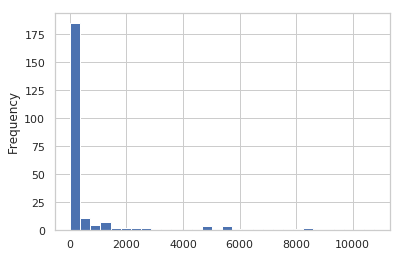

In [297]:
dropped['count'].plot.hist(bins=30)

In [385]:
dropped

,ZIP,IncomeBucket1,IncomeBucket2,IncomeBucket3,IncomeBucket4,IncomeBucket5,IncomeBucket6,IncomeBucket7,IncomeBucket8,IncomeBucket9,...,ZipArea,Density,BachelorsRate,count,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,AREA_WEIGHTED_RISK
0,70001,0.06799,0.05228,0.12038,0.10860,0.13719,0.16405,0.12205,0.13274,0.04742,...,5.99900,6333.72229,9100.00000,5510,185659415.89000,51381016.89000,3415454.59000,787342000.00000,215159400.00000,0.72865
1,70002,0.06344,0.03951,0.09630,0.08096,0.14886,0.17199,0.10741,0.13020,0.09378,...,3.21900,5864.86486,6504.00000,4450,292795701.10000,97801585.70000,1006826.25000,818400100.00000,212752400.00000,0.72446
2,70003,0.05175,0.03463,0.09961,0.09516,0.12715,0.20618,0.13154,0.15299,0.06555,...,7.01900,5720.18806,9036.00000,8433,240340893.95000,80550898.82000,9182640.25000,1088872100.00000,298825800.00000,0.72837
3,70005,0.04589,0.03268,0.08606,0.08184,0.15706,0.15971,0.11364,0.15231,0.06272,...,4.18300,5818.55128,9197.00000,4788,230917281.17000,79844358.24000,1798270.73000,791996000.00000,235310300.00000,0.76140
4,70006,0.05831,0.02453,0.13241,0.10385,0.09461,0.14115,0.12603,0.15762,0.07881,...,2.58900,6065.27617,4055.00000,4686,331357467.34000,110330610.28000,3824786.81000,711249700.00000,183343200.00000,0.73380
5,70030,0.03726,0.03422,0.06236,0.12700,0.16122,0.16730,0.09582,0.14297,0.12548,...,31.49800,145.56480,456.00000,76,152540.68000,29061.67000,0.00000,8855500.00000,3278200.00000,0.70095
6,70031,0.07056,0.00000,0.11492,0.07460,0.14516,0.16734,0.18548,0.18750,0.05444,...,3.51700,374.18254,130.00000,24,1123.87000,7500.00000,0.00000,3333800.00000,1167200.00000,0.72211
7,70032,0.09786,0.04668,0.15636,0.08661,0.13611,0.16029,0.13723,0.13442,0.02756,...,1.74800,2079.51945,533.00000,2926,246458065.69000,78765424.87000,3001556.27000,282272000.00000,91094500.00000,0.72118
8,70036,0.06061,0.01632,0.13986,0.12354,0.20513,0.26340,0.05828,0.07226,0.04196,...,4.37900,280.20096,90.00000,252,3968313.76000,1253554.09000,350215.00000,23028200.00000,5205300.00000,0.74289
9,70037,0.05252,0.04045,0.07818,0.05591,0.15228,0.20292,0.09942,0.19120,0.08634,...,62.50700,249.41207,2563.00000,1205,19865725.90000,8684108.68000,90000.00000,192242500.00000,69774200.00000,0.77292
